<a href="https://colab.research.google.com/github/jimaguere/Electiva_1/blob/main/ADT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ajustar un modelo para el conjunto de datos Sick. El conjunto de datos Sick, el cual registra enfermedades de la tiroides proporcionados por: el Instituto Garavan, Instituto de Nueva Gales del Sur , Syndney, Australia. El mismo recibió algunas transformaciones como por ejemplo el sexo en vez de ser F/M se definió como 0/1. El archivo contiene 955 estudios de pacientes, donde se pretende determinar si tienen o no una enfermedad. Clase(1) Enfermo Clase(0) No Enfermo.

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import pandas as pd
import numpy as np

datos=pd.read_csv("/content/drive/MyDrive/ELECTIVA 1/Guia_arbol_decision/Sick.txt",sep="\t")
datos.head()

,caso,edad,genero,en_medicacion_tiroxina,consulta_sobre_tiroxina,en_medicación_antitiroidea,depresion,embarazada,cirugía_de_tiroides,I131_tratamineto,consulta_hipotiroidea,consulta_hipertiroidea,litio,enfermedad_endocrinologica_bocio,tumor,hipopituitario,transtornos,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,fuente_de_referencia,clase
0,1,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.900,2.044,129.0,1.05,123.0,5,0
1,2,51,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.250,1.900,101.0,1.08,94.0,5,0
2,3,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000,2.500,133.0,1.08,123.0,2,0
3,4,73,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.800,2.100,103.0,0.92,112.0,2,0
4,5,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.774,3.900,141.0,1.12,126.0,5,0



**1)** ¿Prepare el conjunto de datos elimine los valores incompletos para este conjunto de datos o impute con alguna medida?.

In [151]:
datos.describe()

,caso,edad,genero,en_medicacion_tiroxina,consulta_sobre_tiroxina,en_medicación_antitiroidea,depresion,embarazada,cirugía_de_tiroides,I131_tratamineto,consulta_hipotiroidea,consulta_hipertiroidea,litio,enfermedad_endocrinologica_bocio,tumor,hipopituitario,transtornos,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,fuente_de_referencia,clase
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,494.175916,51.794764,0.336126,0.120419,0.016754,0.015707,0.035602,0.015707,0.018848,0.017801,0.058639,0.056545,0.002094,0.009424,0.026178,0.001047,0.051309,3.773681,2.039007,108.330639,0.992342,110.891749,4.269110,0.050262
std,285.184758,22.972953,0.472630,0.325621,0.128415,0.124404,0.185393,0.124404,0.136060,0.132297,0.235070,0.231091,0.045739,0.096670,0.159748,0.032359,0.220743,12.110847,0.714392,33.916230,0.189764,30.195374,1.109252,0.218599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.100000,4.800000,0.310000,5.400000,1.000000,0.000000
25%,247.500000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.530000,1.700000,88.000000,0.890000,94.000000,4.000000,0.000000
50%,492.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,2.044000,107.000000,0.992300,110.890000,5.000000,0.000000
75%,740.500000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,2.200000,123.000000,1.070000,123.000000,5.000000,0.000000
max,990.000000,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,183.000000,7.000000,430.000000,2.120000,395.000000,5.000000,1.000000


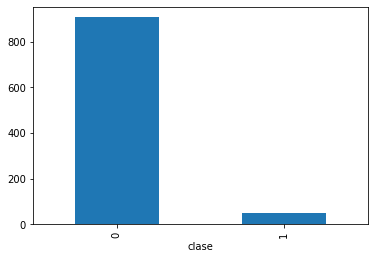

clase
0    907
1     48
Name: caso, dtype: int64

In [152]:
#Estadísticos
import matplotlib.pyplot as plt

datos.groupby('clase').count()["caso"].plot(kind='bar')
plt.show()
datos.groupby('clase').count()['caso']

In [153]:
# valores faltantes por columna
display(datos.isnull().sum())

caso                                0
edad                                0
genero                              0
en_medicacion_tiroxina              0
consulta_sobre_tiroxina             0
en_medicación_antitiroidea          0
depresion                           0
embarazada                          0
cirugía_de_tiroides                 0
I131_tratamineto                    0
consulta_hipotiroidea               0
consulta_hipertiroidea              0
litio                               0
enfermedad_endocrinologica_bocio    0
tumor                               0
hipopituitario                      0
transtornos                         0
nivel_TSH                           0
nivel_T3                            0
nivel_TT4                           0
nivel_T4U                           0
nivel_FTI                           0
fuente_de_referencia                0
clase                               0
dtype: int64


**2)** Separe la variable clase a predecir en una variable Y.

**3)** Separe un conjunto de datos denominado X que no contenga la variable clase

In [154]:
Y=datos['clase']
X = datos.drop(labels=['clase'],axis=1)

In [155]:
X.columns

Index(['caso', 'edad', 'genero', 'en_medicacion_tiroxina',
       'consulta_sobre_tiroxina', 'en_medicación_antitiroidea', 'depresion',
       'embarazada', 'cirugía_de_tiroides', 'I131_tratamineto',
       'consulta_hipotiroidea', 'consulta_hipertiroidea', 'litio',
       'enfermedad_endocrinologica_bocio', 'tumor', 'hipopituitario',
       'transtornos', 'nivel_TSH', 'nivel_T3', 'nivel_TT4', 'nivel_T4U',
       'nivel_FTI', 'fuente_de_referencia'],
      dtype='object')


**4)** Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30 (genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó). Indique que cantidad de casos quedaron para cada ambiente).

In [156]:

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)
# Show the results of the split
print("Total ejemplos train {}.".format(X_train.shape[0]))
print("Total ejemplos test {}.".format(X_test.shape[0]))


print("Enfermos train:",y_train[y_train==1].count())
print("No Enfermos train:",y_train[y_train==0].count())

print("Enfermos test:",y_test[y_test==1].count())
print("No Enfermos test",y_test[y_test==0].count())

Total ejemplos train 668.
Total ejemplos test 287.
Enfermos train: 27
No Enfermos train: 641
Enfermos test: 21
No Enfermos test 266


**5)** Ajuste 3 modelos de diferentes profundidades (max_depth) usando el conjunto de
entrenamiento 70%

In [157]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
modelo1 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            #min_samples_leaf=10,
                                            max_depth = 4
                                           )
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [158]:

# Crear Arbol de decision con profundidad = 10
modelo2 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            #min_samples_leaf=10,
                                            max_depth = 10
                                           )
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [159]:

# Crear Arbol de decision con profundidad = 10
modelo3 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            #min_samples_leaf=10,
                                            max_depth = 100
                                           )
modelo3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [160]:

# Crear Arbol de decision con profundidad = 10
modelo4 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=11,
                                            min_samples_leaf=11,
                                            max_depth = 3
                                           )
modelo4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Modelo RandomForest** Baggin

In [161]:
from sklearn.ensemble import RandomForestClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)

modelo_rf=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

modelo_rf=modelo_rf.fit(X_train, y_train)

**Modelo XGBoost** Boosting

In [162]:

from xgboost import XGBClassifier

params = {'objective':'binary:logistic',
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
           'max_depth': 3, 'alpha': 0,
          'n_estimators':500}



modelo_xgb = XGBClassifier(**params)
modelo_xgb.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


**6)** Explique dos reglas de uno de los arboles generados. Explique que tan bien separa los casos regla.

In [ ]:
#  -p[1]*log[p[1]]+ --p[0]*log[p[0]]
# -(  35/668)log(  35/668) + - (633/668)*log(633/668)

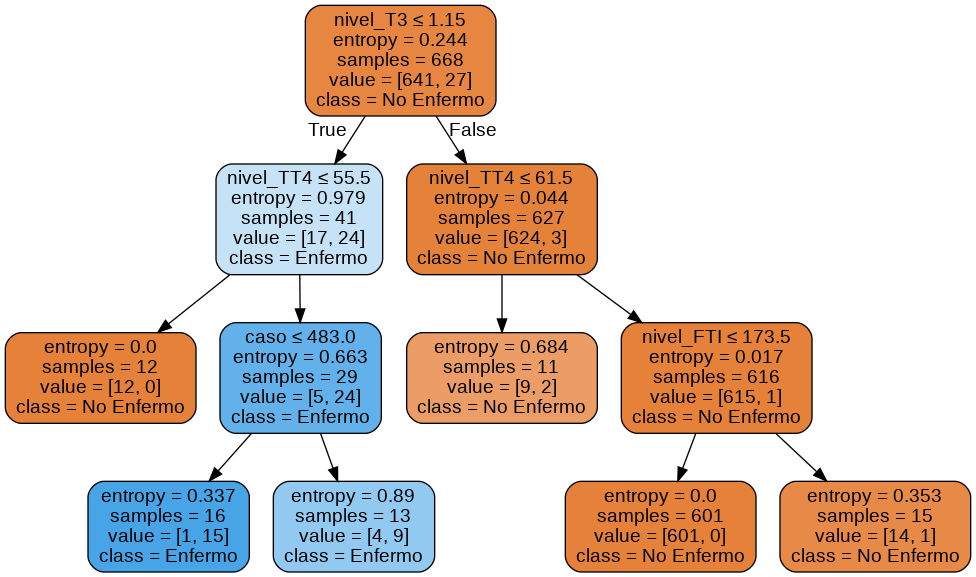

In [163]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No Enfermo','Enfermo'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

**7)** Obtener la matriz de confusión tanto para el ambiente de entrenamiento como de
Validación de los 3 modelos.

In [164]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# Función para plot de la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')

**Matriz de confusión MODELO 1 TEST**

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 17
verdaderos negativos: 265
falsos positivos: 1
falsos negativos: 4
accuracy: 0.9825783972125436
accuracy balanced: 0.9028822055137844


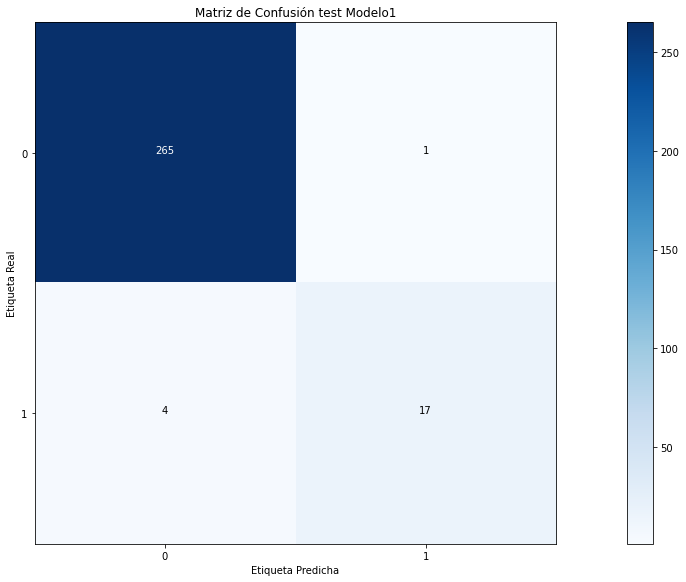

In [165]:

import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo1.predict(X_test)


cnf_matrix = confusion_matrix(y_test,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test Modelo1')


tn, fp, fn, tp = confusion_matrix(y_test,modelo1.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

Matriz de confusión MODELO 1 TRAIN

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 35
verdaderos negativos: 631
falsos positivos: 2
falsos negativos: 0
accuracy: 0.9970059880239521
accuracy balanced: 0.9984202211690363


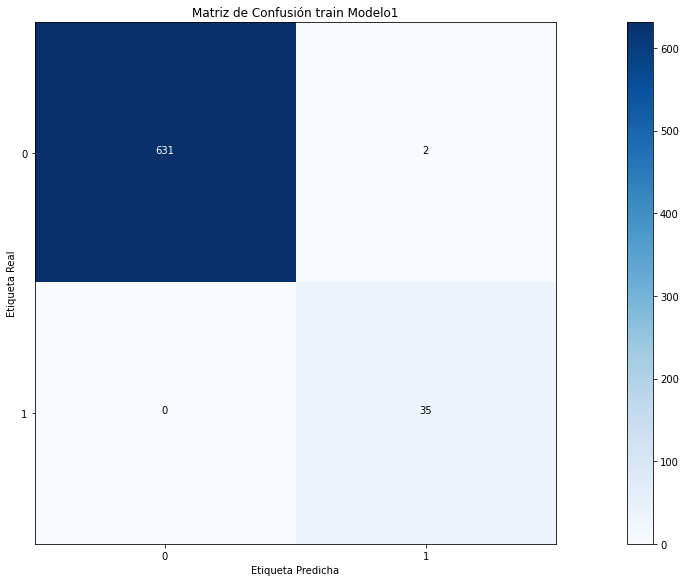

In [ ]:
import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo1.predict(X_train)


cnf_matrix = confusion_matrix(y_train,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión train Modelo1')


tn, fp, fn, tp = confusion_matrix(y_train,modelo1.predict(X_train)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

Matriz de confusión MODELO 2 TEST

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 9
verdaderos negativos: 269
falsos positivos: 5
falsos negativos: 4
accuracy: 0.9686411149825784
accuracy balanced: 0.8370297585626052


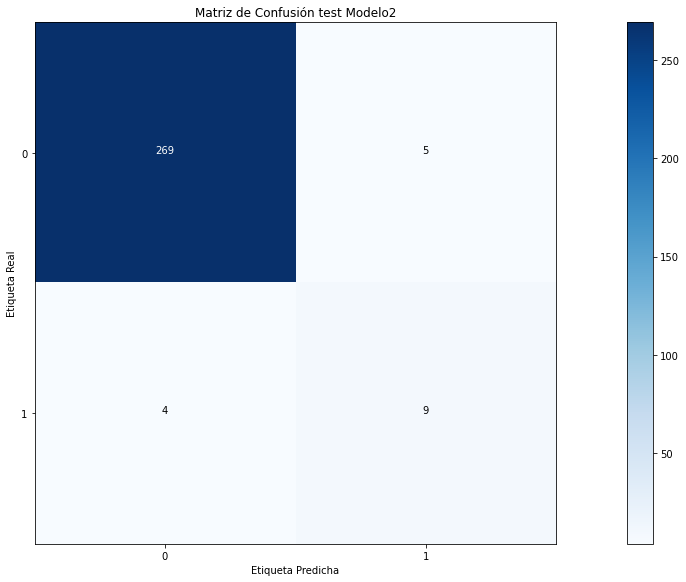

In [ ]:
import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo2.predict(X_test)


cnf_matrix = confusion_matrix(y_test,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test Modelo2')


tn, fp, fn, tp = confusion_matrix(y_test,modelo2.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

Matriz de confusión MODELO 2 TRAIN

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 35
verdaderos negativos: 633
falsos positivos: 0
falsos negativos: 0
accuracy: 1.0
accuracy balanced: 1.0


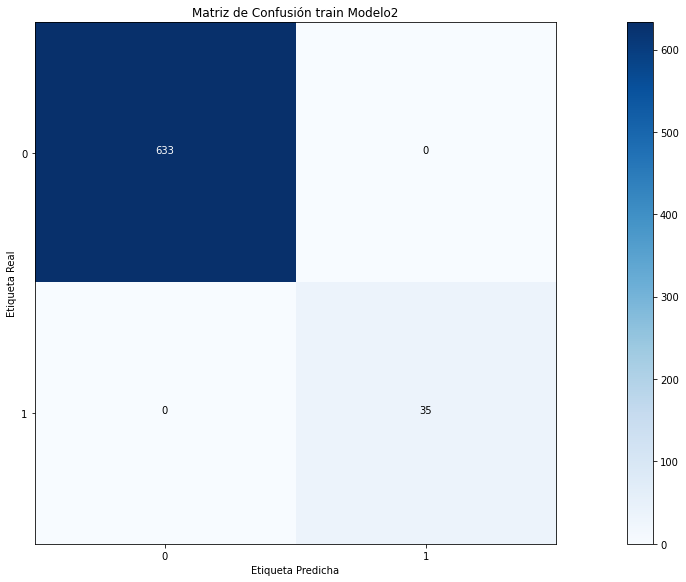

In [ ]:
import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo2.predict(X_train)


cnf_matrix = confusion_matrix(y_train,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión train Modelo2')


tn, fp, fn, tp = confusion_matrix(y_train,modelo2.predict(X_train)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

Matriz de confusión MODELO 4 TEST

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 11
verdaderos negativos: 274
falsos positivos: 0
falsos negativos: 2
accuracy: 0.9930313588850174
accuracy balanced: 0.9230769230769231


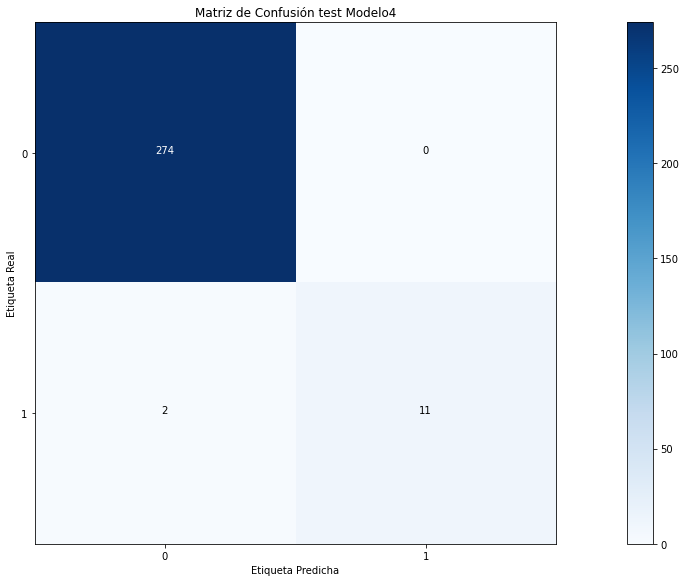

In [ ]:

import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo4.predict(X_test)


cnf_matrix = confusion_matrix(y_test,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test Modelo4')


tn, fp, fn, tp = confusion_matrix(y_test,modelo4.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

Matriz de confusión MODELO 4 TRAIN

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 31
verdaderos negativos: 627
falsos positivos: 6
falsos negativos: 4
accuracy: 0.9850299401197605
accuracy balanced: 0.9381178063642519


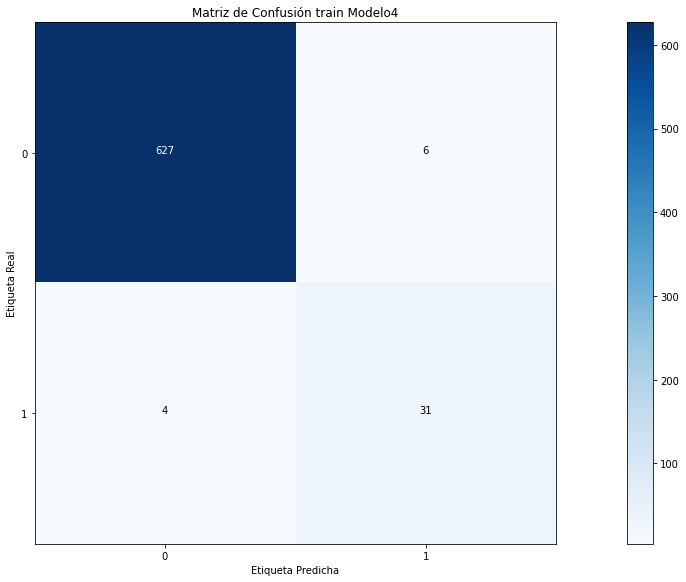

In [ ]:
import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo4.predict(X_train)


cnf_matrix = confusion_matrix(y_train,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión train Modelo4')


tn, fp, fn, tp = confusion_matrix(y_train,modelo4.predict(X_train)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

**Matriz Confusión  Modelo RF Test**

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 11
verdaderos negativos: 267
falsos positivos: 7
falsos negativos: 2
accuracy: 0.9686411149825784
accuracy balanced: 0.9103032004491858


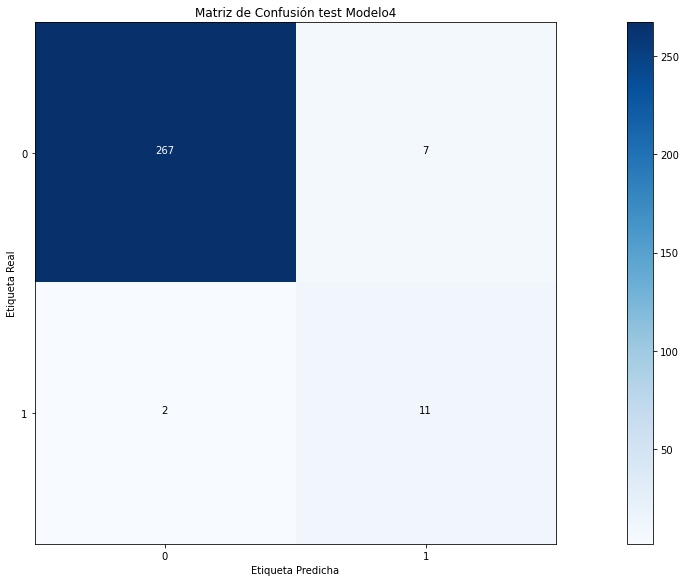

In [ ]:

import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo_rf.predict(X_test)


cnf_matrix = confusion_matrix(y_test,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test Modelo4')


tn, fp, fn, tp = confusion_matrix(y_test,modelo_rf.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

Matriz Confusión  Modelo RF TRAIN

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 32
verdaderos negativos: 618
falsos positivos: 15
falsos negativos: 3
accuracy: 0.9730538922155688
accuracy balanced: 0.9452945159106296


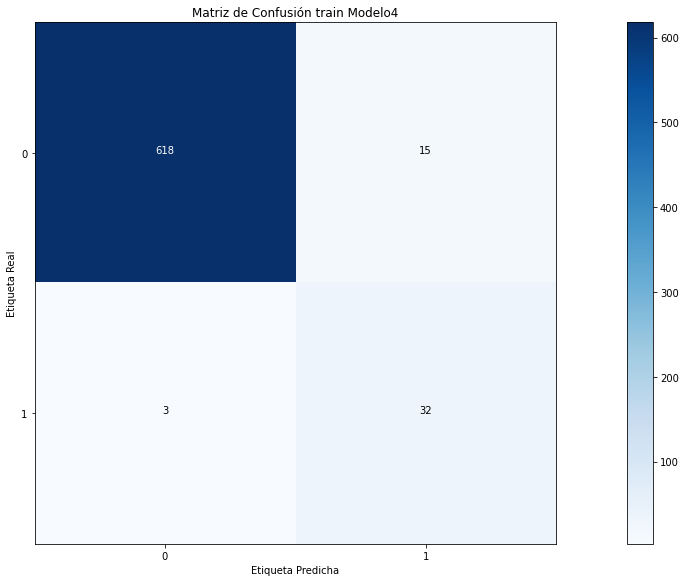

In [ ]:
import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo_rf.predict(X_train)


cnf_matrix = confusion_matrix(y_train,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión train Modelo4')


tn, fp, fn, tp = confusion_matrix(y_train,modelo_rf.predict(X_train)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

Matriz Confusión Modelo XGB Test

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 10
verdaderos negativos: 274
falsos positivos: 0
falsos negativos: 3
accuracy: 0.9895470383275261
accuracy balanced: 0.8846153846153846


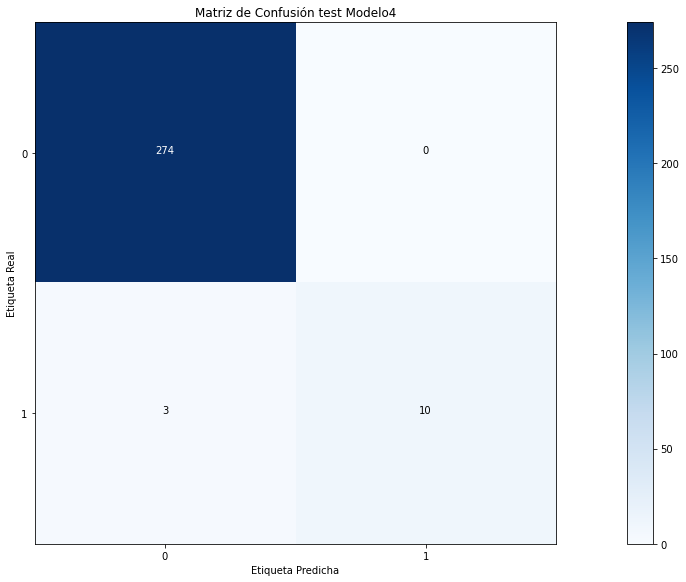

In [ ]:

import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo_xgb.predict(X_test)


cnf_matrix = confusion_matrix(y_test,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test Modelo4')


tn, fp, fn, tp = confusion_matrix(y_test,modelo_xgb.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

**Matriz Confusión Modelo XGB Train**

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 35
verdaderos negativos: 633
falsos positivos: 0
falsos negativos: 0
accuracy: 1.0
accuracy balanced: 1.0


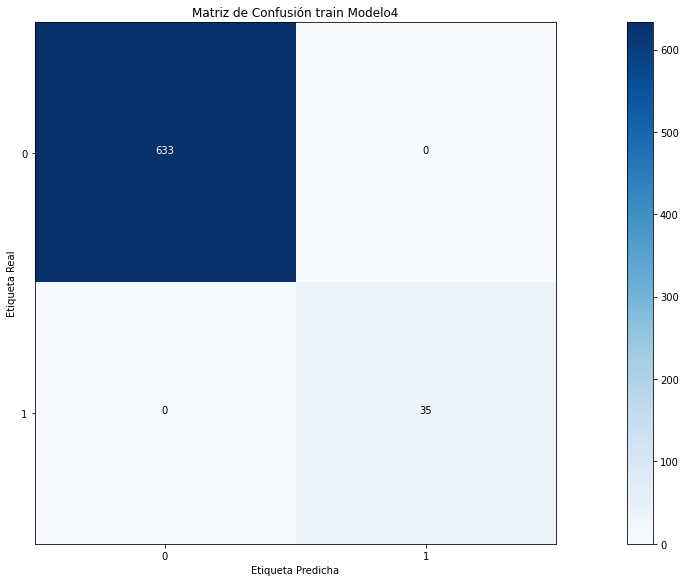

In [ ]:
import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo_xgb.predict(X_train)


cnf_matrix = confusion_matrix(y_train,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión train Modelo4')


tn, fp, fn, tp = confusion_matrix(y_train,modelo_xgb.predict(X_train)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

**8) **Calcular el AUC y el gráfico ROC en entrenamiento y validación de los 3 modelos.

In [166]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,classification_report,balanced_accuracy_score


def eval_model(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    # Select (prediction, true label) and compute test error
    print("accuracy test:",accuracy_score(y_test, predictions_test))
    print("accuracy train:",accuracy_score(y_train, predictions_train))
    
    print("Balanced_accuracy test:",balanced_accuracy_score(y_test, predictions_test))
    print("Balanced_accuracy train:",balanced_accuracy_score(y_train, predictions_train))
      
    return (balanced_accuracy_score(y_test, predictions_test))

def eval_model_alt(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    # Select (prediction, true label) and compute test error   
    return (balanced_accuracy_score(y_test, predictions_test))



print("_________________________________________")
print("Modelo 1")
eval_model(X_test,X_train,y_test,y_train,modelo1)
print("_________________________________________")
print("Modelo 2")
eval_model(X_test,X_train,y_test,y_train,modelo2)
print("_________________________________________")
print("Modelo 3")
eval_model(X_test,X_train,y_test,y_train,modelo3)
print("_________________________________________")
print("Modelo 4")
eval_model(X_test,X_train,y_test,y_train,modelo4)
print("_________________________________________")
print("_________________________________________")
print("Modelo RF")
eval_model(X_test,X_train,y_test,y_train,modelo_rf)
print("_________________________________________")
print("Modelo XGB")
eval_model(X_test,X_train,y_test,y_train,modelo_xgb)

_________________________________________
Modelo 1
accuracy test: 0.9825783972125436
accuracy train: 0.9985029940119761
Balanced_accuracy test: 0.9028822055137844
Balanced_accuracy train: 0.999219968798752
_________________________________________
Modelo 2
accuracy test: 0.9790940766550522
accuracy train: 1.0
Balanced_accuracy test: 0.8790726817042607
Balanced_accuracy train: 1.0
_________________________________________
Modelo 3
accuracy test: 0.975609756097561
accuracy train: 1.0
Balanced_accuracy test: 0.8552631578947368
Balanced_accuracy train: 1.0
_________________________________________
Modelo 4
accuracy test: 0.9860627177700348
accuracy train: 0.9880239520958084
Balanced_accuracy test: 0.9266917293233082
Balanced_accuracy train: 0.9405442884382041
_________________________________________
_________________________________________
Modelo RF
accuracy test: 0.9616724738675958
accuracy train: 0.9715568862275449
Balanced_accuracy test: 0.9354636591478697
Balanced_accuracy train: 0.9

0.831453634085213

**Validación cruzada**

In [167]:
from sklearn.model_selection import StratifiedKFold

def validacion_cruzada(x_train,y_train,kfolds,model):
    cv = StratifiedKFold(n_splits=kfolds,shuffle=False)
    prom=[]
    for train,test in cv.split(x_train,y_train):
        modelo=model.fit(x_train.iloc[train],y_train.iloc[train])
        prom.append(eval_model_alt(x_train.iloc[test],x_train.iloc[train] ,y_train.iloc[test],y_train.iloc[train],modelo))

    return(prom)  

In [168]:
# Se realiza validación cruzada pasando cuantas particiones del conjuto de datos quiere entrenar
kflods = 4
ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo1)

print('-------------------------')
display(ab_vec)
print('Promedio modelo 1:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo2)

print('-------------------------')
display(ab_vec)
print('Promedio modelo 2:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo3)

print('-------------------------')
display(ab_vec)
print('Promedio modelo 3:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo4)

print('-------------------------')
display(ab_vec)
print('Promedio modelo 4:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo_rf)

print('-------------------------')
display(ab_vec)
print('Promedio modelo RF:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo_xgb)

print('-------------------------')
display(ab_vec)
print('Promedio modelo XGB:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

-------------------------


[0.9135610766045549,
 0.7825892857142858,
 0.8446428571428571,
 0.9254464285714286]

Promedio modelo 1: 0.8665599120082815
-------------------------
-------------------------


[0.6635610766045549,
 0.7825892857142858,
 0.8446428571428571,
 0.8540178571428572]

Promedio modelo 2: 0.7862027691511386
-------------------------
-------------------------


[0.9135610766045549,
 0.7825892857142858,
 0.8446428571428571,
 0.7825892857142858]

Promedio modelo 3: 0.8308456262939958
-------------------------
-------------------------


[0.9166666666666667,
 0.6397321428571429,
 0.8415178571428572,
 0.9254464285714286]

Promedio modelo 4: 0.8308407738095238
-------------------------
-------------------------


[0.9875776397515528,
 0.9129464285714286,
 0.8383928571428572,
 0.9098214285714286]

Promedio modelo RF: 0.9121845885093168
-------------------------
-------------------------


[0.8302277432712215,
 0.7111607142857143,
 0.8446428571428571,
 0.9285714285714286]

Promedio modelo XGB: 0.8286506858178053
-------------------------


In [169]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, balanced_accuracy_score


def _score_func(estimator, X, y):
  y_pred_test = estimator.predict(X)
  return balanced_accuracy_score(y, y_pred_test)

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold,scoring=_score_func)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.balanced_accuracy_score(Y, self.predictions)))
from sklearn.model_selection import GridSearchCV


**Parámetros Árbol**

In [170]:
%%time
gb = Class_Fit(clf = tree.DecisionTreeClassifier)
param_grid = {
             'criterion':['entropy','gini'],
             'max_depth':[3,4,5,10,20],
             'min_samples_leaf':[5,11,3,1],
             'min_impurity_decrease':[0,0.025,0.0025],
             'min_samples_split':[2,4,10],
             'splitter':['best','random']
             }


gb.grid_search(parameters = param_grid, Kfold = 4)
gb.grid_fit(X = X_train, Y = y_train)

print("Parámetros árbol:",gb.grid.best_params_)
mejor_arbol=gb.grid.best_estimator_

Parámetros árbol: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.025, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
CPU times: user 10.4 s, sys: 2.91 ms, total: 10.4 s
Wall time: 10.4 s


In [171]:
print("_________________________________________")
print("Modelo mejor")
eval_model(X_test,X_train,y_test,y_train,mejor_arbol)
print("_________________________________________")

_________________________________________
Modelo mejor
accuracy test: 0.9860627177700348
accuracy train: 0.9880239520958084
Balanced_accuracy test: 0.9266917293233082
Balanced_accuracy train: 0.9405442884382041
_________________________________________


In [172]:
ab_vec=validacion_cruzada(X_train,y_train, kflods, mejor_arbol)

print('-------------------------')
display(ab_vec)
print('Promedio modelo mejor_arbol:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

-------------------------


[1.0, 0.7825892857142858, 0.8383928571428572, 0.9254464285714286]

Promedio modelo mejor_arbol: 0.8866071428571428
-------------------------


**Parámetros RandomForest**

In [ ]:
%%time
gb = Class_Fit(clf = RandomForestClassifier)
param_grid = {
             'criterion':['entropy','gini'],
             'max_depth':[3,5,10,20],
             'min_samples_leaf':[5,11,3,1],
             'min_impurity_decrease':[0,0.025,0.0025],
             'min_samples_split':[2,4,10],
             'n_estimators':[100],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced', 'balanced_subsample']
             }

gb.grid_search(parameters = param_grid, Kfold = 4)
gb.grid_fit(X = X_train, Y = y_train)

CPU times: user 17min 42s, sys: 3.87 s, total: 17min 46s
Wall time: 17min 47s


In [ ]:
print("Parámetros RandomForestClassifier:",gb.grid.best_params_)
mejor_rf=gb.grid.best_estimator_
mejor_rf

Parámetros RandomForestClassifier: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_impurity_decrease': 0.025, 'min_samples_leaf': 11, 'min_samples_split': 10, 'n_estimators': 100}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.025,
                       min_impurity_split=None, min_samples_leaf=11,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
print("_________________________________________")
print("Modelo mejor RandomForestClassifier")
eval_model(X_test,X_train,y_test,y_train,mejor_rf)
print("_________________________________________")

_________________________________________
Modelo mejor RandomForestClassifier
accuracy test: 0.9651567944250871
accuracy train: 0.9700598802395209
Balanced_accuracy test: 0.93734335839599
Balanced_accuracy train: 0.9666608886577686
_________________________________________


In [ ]:
ab_vec=validacion_cruzada(X_train,y_train, kflods, mejor_rf)

print('-------------------------')
display(ab_vec)
print('Promedio modelo mejor RandomForestClassifier:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

-------------------------


[0.9073498964803313, 0.984375, 0.8446428571428571, 0.9066964285714285]

Promedio modelo mejor RandomForestClassifier: 0.9107660455486541
-------------------------


**Parámetros XGBOOST**

In [ ]:
%%time
gb = Class_Fit(clf = XGBClassifier)
param_grid = {
             'objective':['binary:logistic'],
             'n_estimators' : [500],
              'eta':[0.03,0.003],    
              'gamma':[0.03,0.003,5],
              'max_depth':[5,20,3],
              'min_child_weight':[0.5,5],
              'alpha':[0.003,0.03],
              'scale_pos_weight':[y_train[y_train==0].count()/y_train[y_train==1].count(),0.5],
              'n_job':[-1],
              'booster':['gblinear','gbtree'],  
             }
gb.grid_search(parameters = param_grid, Kfold = 10)
gb.grid_fit(X = X_train, Y = y_train)

CPU times: user 7min 52s, sys: 4.13 s, total: 7min 56s
Wall time: 7min 57s


In [ ]:
print("Parámetros XGBClassifier:",gb.grid.best_params_)
mejor_xgb=gb.grid.best_estimator_

Parámetros XGBClassifier: {'alpha': 0.003, 'booster': 'gbtree', 'eta': 0.03, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 0.5, 'n_estimators': 500, 'n_job': -1, 'objective': 'binary:logistic', 'scale_pos_weight': 23.74074074074074}


In [ ]:
print("_________________________________________")
print("Modelo mejor XGBClassifier")
eval_model(X_test,X_train,y_test,y_train,mejor_xgb)
print("_________________________________________")

_________________________________________
Modelo mejor XGBClassifier
accuracy test: 0.9825783972125436
accuracy train: 0.9940119760479041
Balanced_accuracy test: 0.9248120300751879
Balanced_accuracy train: 0.9968798751950079
_________________________________________


In [ ]:
ab_vec=validacion_cruzada(X_train,y_train, 4, mejor_xgb)

print('-------------------------')
display(ab_vec)
print('Promedio modelo mejor XGBClassifier:', sum(ab_vec)/len(ab_vec)) 
print('-------------------------')

-------------------------


[1.0, 0.7763392857142857, 0.8352678571428571, 0.9254464285714286]

Promedio modelo mejor XGBClassifier: 0.8842633928571428
-------------------------


In [173]:
#mejor Modelo árbol
param_arbol={'criterion': 'entropy', 'max_depth': 3,
             'min_impurity_decrease': 0.025, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}

modelo_final_arbol=tree.DecisionTreeClassifier(**param_arbol)
modelo_final_arbol.fit(X_train, y_train)

param_rf={'class_weight': 'balanced_subsample', 'criterion': 'entropy',
'max_depth': 10, 'max_features': 'sqrt', 'min_impurity_decrease': 0.025, 'min_samples_leaf': 11, 'min_samples_split': 10, 'n_estimators': 100}

modelo_final_rf=RandomForestClassifier(**param_rf)
modelo_final_rf.fit(X_train, y_train)

param_xgb={'alpha': 0.003, 'booster': 'gbtree', 'eta': 0.03, 'gamma': 5, 'max_depth': 3,
'min_child_weight': 0.5, 'n_estimators': 500, 'n_job': -1, 'objective': 'binary:logistic', 'scale_pos_weight': 23.74074074074074}

modelo_final_xgb=XGBClassifier(**param_xgb)
modelo_final_xgb.fit(X_train, y_train)

XGBClassifier(alpha=0.003, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              eta=0.03, gamma=5, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=0.5, missing=None, n_estimators=500,
              n_job=-1, n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=23.74074074074074, seed=None, silent=None,
              subsample=1, verbosity=1)

In [174]:
print("Modelo A")
eval_model(X_test,X_train,y_test,y_train,modelo_final_arbol)
kflods = 4
ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo_final_arbol)
display(ab_vec)
print('Promedio modelo A:', sum(ab_vec)/len(ab_vec)) 
print("_________________________________________")
print("Modelo RF")
eval_model(X_test,X_train,y_test,y_train,modelo_final_rf)
kflods = 4
ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo_final_rf)
display(ab_vec)
print('Promedio modelo RF:', sum(ab_vec)/len(ab_vec)) 
print("_________________________________________")
print("Modelo XGB")
eval_model(X_test,X_train,y_test,y_train,modelo_final_xgb)
kflods = 4
ab_vec=validacion_cruzada(X_train,y_train, kflods, modelo_final_xgb)
display(ab_vec)
print('Promedio modelo RF:', sum(ab_vec)/len(ab_vec)) 

Modelo A
accuracy test: 0.9860627177700348
accuracy train: 0.9880239520958084
Balanced_accuracy test: 0.9266917293233082
Balanced_accuracy train: 0.9405442884382041


[1.0, 0.7825892857142858, 0.8383928571428572, 0.9254464285714286]

Promedio modelo A: 0.8866071428571428
_________________________________________
Modelo RF
accuracy test: 0.9790940766550522
accuracy train: 0.9790419161676647
Balanced_accuracy test: 0.9448621553884712
Balanced_accuracy train: 0.9536025885479864


[0.9906832298136645,
 0.9129464285714286,
 0.8415178571428572,
 0.9098214285714286]

Promedio modelo RF: 0.9137422360248447
_________________________________________
Modelo XGB
accuracy test: 0.9825783972125436
accuracy train: 0.9940119760479041
Balanced_accuracy test: 0.9248120300751879
Balanced_accuracy train: 0.9968798751950079


[1.0, 0.7763392857142857, 0.8352678571428571, 0.9254464285714286]

Promedio modelo RF: 0.8842633928571428


**CURVA ROC ÁRBOL**

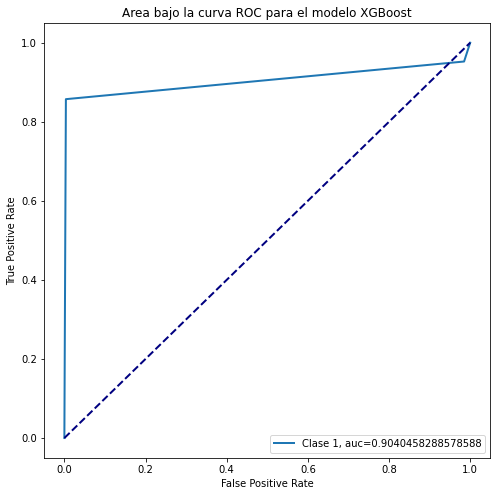

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 18
verdaderos negativos: 265
falsos positivos: 1
falsos negativos: 3
accuracy: 0.9860627177700348
accuracy balanced: 0.9266917293233082


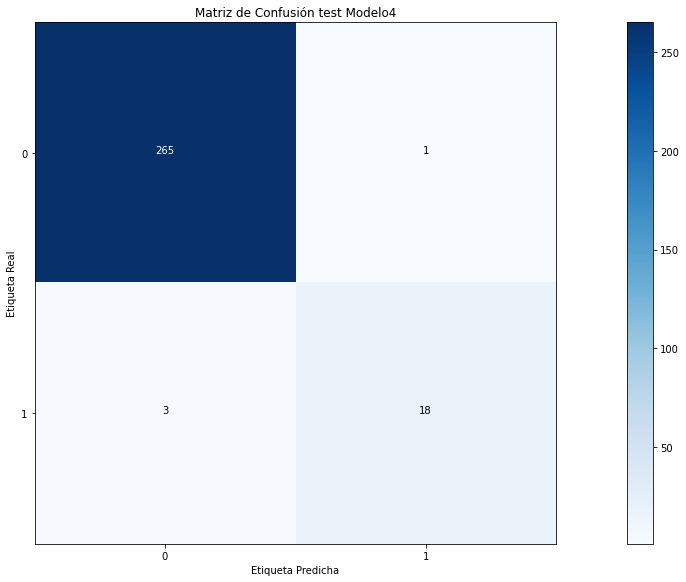

In [180]:
#Curva ROC

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
plt.figure(figsize = (8,8))
i=1
y_pred_proba = modelo_final_arbol.predict_proba(X_test)[::,i]
#y_pred_proba= modelo_final_rf.predict(X_test)
# Elejimos punto de corte para encontrar la mayor area bajo la curva
#y_pred_proba = [1 if x >= 0.49 else 0 for x in y_pred_proba]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, lw=2,label=f"Clase {i}, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area bajo la curva ROC para el modelo XGBoost')
plt.show()


#-----


import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo_final_arbol.predict(X_test)


cnf_matrix = confusion_matrix(y_test,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test Modelo4')


tn, fp, fn, tp = confusion_matrix(y_test,modelo_final_arbol.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

**CURVA ROC RANDOMFOREST**

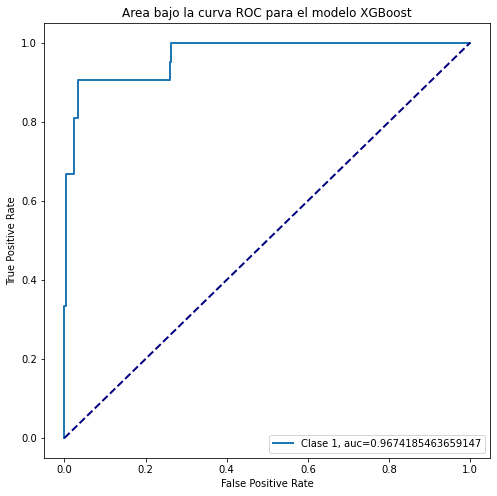

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 18
verdaderos negativos: 257
falsos positivos: 9
falsos negativos: 3
accuracy: 0.9581881533101045
accuracy balanced: 0.9116541353383458


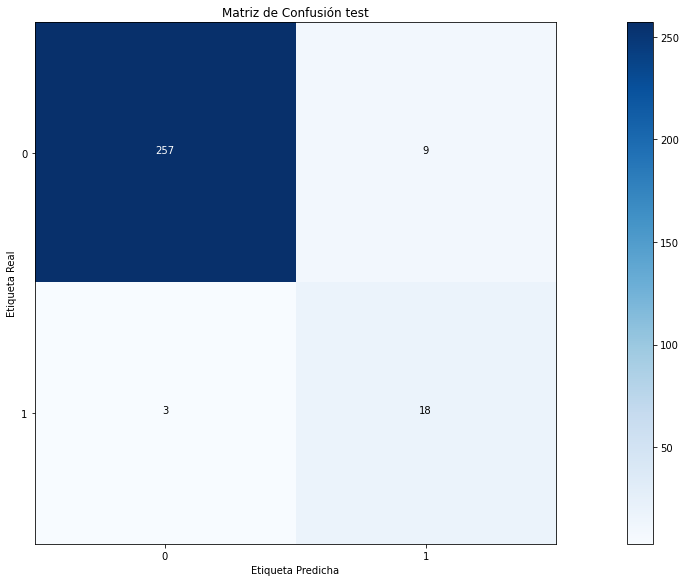

In [185]:
plt.figure(figsize = (8,8))
i=1
y_pred_proba = modelo_final_rf.predict_proba(X_test)[::,i]
#y_pred_proba= modelo_final_rf.predict(X_test)
# Elejimos punto de corte para encontrar la mayor area bajo la curva
#y_pred_proba = [1 if x >= 0.49 else 0 for x in y_pred_proba]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, lw=2,label=f"Clase {i}, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area bajo la curva ROC para el modelo XGBoost')
plt.show()





import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo_final_rf.predict(X_test)


cnf_matrix = confusion_matrix(y_test,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test')


tn, fp, fn, tp = confusion_matrix(y_test,modelo_final_rf.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

**CURVA ROC XGB**

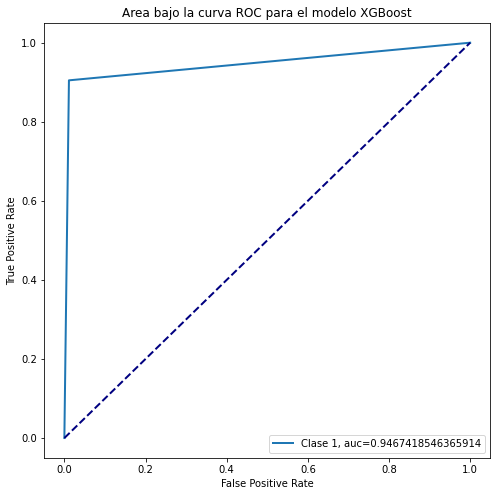

clases: [0, 1]
Confusion matrix, without normalization
verdaderos positivos: 19
verdaderos negativos: 263
falsos positivos: 3
falsos negativos: 2
accuracy: 0.9825783972125436
accuracy balanced: 0.9467418546365916


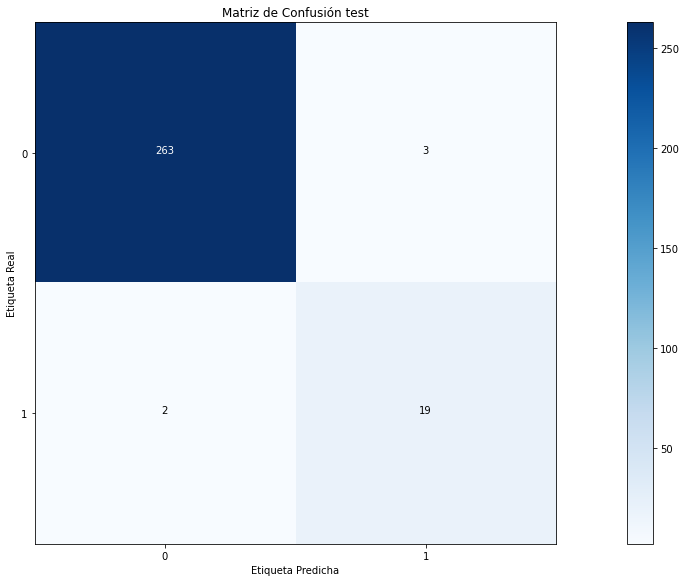

In [222]:
plt.figure(figsize = (8,8))
i=1
y_pred_proba = modelo_final_xgb.predict_proba(X_test)[::,i]
#y_pred_proba= modelo_final_rf.predict(X_test)
# Elejimos punto de corte para encontrar la mayor area bajo la curva
y_pred_proba = [1 if x >= 0.4 else 0 for x in y_pred_proba]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, lw=2,label=f"Clase {i}, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area bajo la curva ROC para el modelo XGBoost')
plt.show()



import numpy as np
class_names = [i for i in range(2)]
print("clases:",class_names)

y_pred=modelo_final_xgb.predict(X_test)


cnf_matrix = confusion_matrix(y_test,y_pred ) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test')


tn, fp, fn, tp = confusion_matrix(y_test,modelo_final_xgb.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

**9)** ¿Cuál de los 3 modelos generados es el mejor para predecir? Modelo 1

**10)** ¿Cuál de los 3 modelos generados consideran que es Funes el memorioso?  entre 2 y 3

**11)** Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la siguiente lógica. Entregue los resultados indicados: Al azar e indique la cantidad de individuos que están enfermos. Utilizando el mejor modelo desarrollado en el punto e indique la cantidad de individuos que están enfermos.

cantidad de individuos Enfermos al azar

In [198]:
n=len(y_test)

# n ---->100
# ?----->25
n_25=(n*10)/100
# 
print("Total datos test:",n)
print("25% de los individuos en el ambiente de test:",int(n_25))
y_test_25=y_test.sample(int(n_25))
print("Cantidad de enfermos alzar 25% test:",y_test_25[y_test_25==1].count())
#y_test.sample(n=25)

Total datos test: 287
25% de los individuos en el ambiente de test: 28
Cantidad de enfermos alzar 25% test: 4


cantidad de individuos Enfermos usando el Modelo

In [199]:
probs_test = modelo_final_xgb.predict_proba(X_test)    
y_pred_test= modelo_final_xgb.predict(X_test)    

data_set_test=X_test.copy()

data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['predicho']=y_pred_test
data_set_test['real']=y_test

data_set_test.sort_values(['predicho_prob_1'],ascending=[False]).head(30)

,caso,edad,genero,en_medicacion_tiroxina,consulta_sobre_tiroxina,en_medicación_antitiroidea,depresion,embarazada,cirugía_de_tiroides,I131_tratamineto,consulta_hipotiroidea,consulta_hipertiroidea,litio,enfermedad_endocrinologica_bocio,tumor,hipopituitario,transtornos,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,fuente_de_referencia,predicho_prob_1,predicho_prob_0,predicho,real
934,562,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.600,0.7,82.0,0.88,93.0,4,0.976120,0.023880,1,1
946,733,89,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800,0.6,101.0,0.73,138.0,4,0.976120,0.023880,1,1
927,392,63,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.500,0.7,86.0,0.72,120.0,4,0.976120,0.023880,1,1
940,568,83,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.200,0.9,69.0,0.74,93.0,4,0.976120,0.023880,1,1
939,567,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.700,1.1,126.0,0.91,138.0,4,0.976120,0.023880,1,1
924,321,72,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.300,1.0,101.0,0.80,127.0,4,0.976120,0.023880,1,1
942,649,62,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.200,0.8,124.0,0.90,137.0,4,0.976120,0.023880,1,1
951,824,85,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.250,1.1,132.0,0.85,154.0,4,0.976120,0.023880,1,1
909,76,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.400,0.8,105.0,0.88,120.0,4,0.976120,0.023880,1,1
911,78,48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.600,1.0,71.0,0.81,88.0,3,0.976120,0.023880,1,1


In [197]:
y_test_modelo=data_set_test.sort_values(['predicho_prob_1'], ascending=[False])[0:y_test_25.count()]
print("Cantidad de enfermos modelo 25% test",len(y_test_modelo[y_test_modelo['real'] == 1]))

print("Cantidad individuos modelo:",len(y_test_modelo))
print("Cantidad individuos alzar:",len(y_test_25))

Cantidad de enfermos modelo 25% test 21
Cantidad individuos modelo: 287
Cantidad individuos alzar: 287
